   ## Alvin Fajar Permana
   ### 210535614804
   ### S1 Teknik Informatika offering A

In [1]:
import pandas as pd
import numpy as np
import sklearn
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
df.shape

(768, 9)

In [4]:
df.dropna(inplace=True)


In [5]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


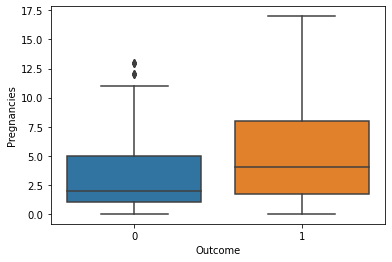

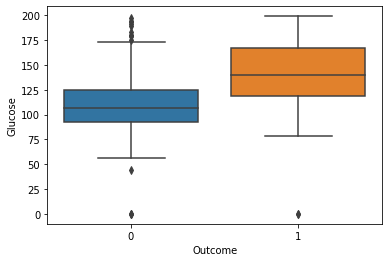

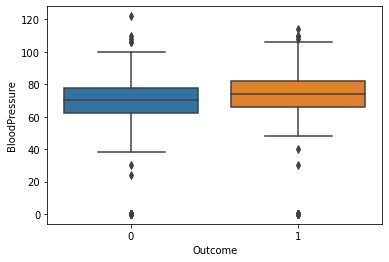

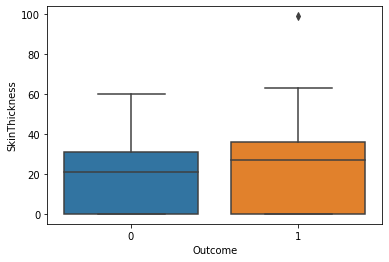

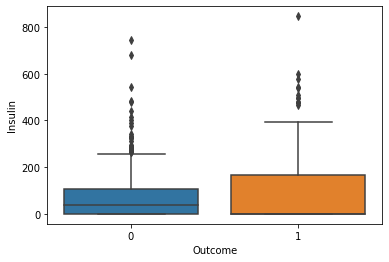

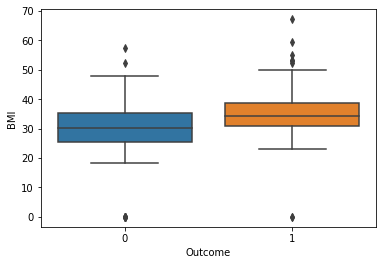

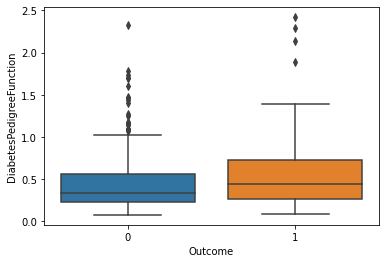

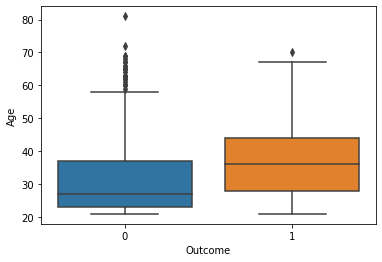

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to be plotted
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = ['Outcome']
# Loop over each feature and create boxplot
for feature in features:
    sns.boxplot(x="Outcome", y=feature, data=df)
    plt.show()


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

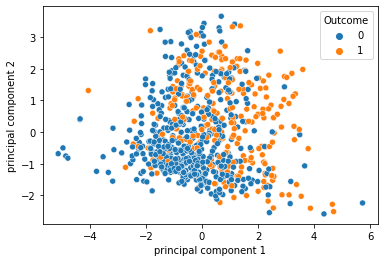

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Perform PCA with n_components = 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Concatenate with target
finalDf = pd.concat([principalDf, df[['Outcome']]], axis=1)

# Visualize result
import seaborn as sns
sns.scatterplot(x='principal component 1', y='principal component 2', hue='Outcome', data=finalDf)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(finalDf.drop('Outcome', axis=1), finalDf['Outcome'], test_size=0.3, random_state=42)

# Create KNN model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train model with train data
knn.fit(X_train, y_train)

# Predict test data
y_pred = knn.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6623376623376623


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# Perform PCA with n_components = 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

# Create new dataframe with principal components and target
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Outcome']]], axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(finalDf.drop('Outcome', axis=1), finalDf['Outcome'], test_size=0.2, random_state=42)

# Train Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on test set
y_pred = gnb.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7077922077922078


In [19]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(finalDf.drop('Outcome', axis=1), finalDf['Outcome'], test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6688311688311688


In [21]:

from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Make predictions on test set
y_pred = dt.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.5844155844155844


In [33]:
#tanpa pca
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Outcome', axis=1))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Outcome'], test_size=0.2, random_state=42)

# Train K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)



Accuracy: 0.6883116883116883


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Outcome', axis=1))

# PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, df['Outcome'], test_size=0.2, random_state=42)

# Train Neural Network
clf = MLPClassifier(hidden_layer_sizes=(5,2), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7337662337662337
